In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [59]:
barrio = pd.read_csv('datasets/barrio_edificio.csv')
barrio.head()

,id_edificio,barrio
0,0,Norte
1,1,Norte
2,2,Norte
3,3,Centro
4,4,Oeste


In [60]:
consumo = pd.read_csv('datasets/consumo_edificio.csv')
consumo.head()

,id_edificio,tipo_edificio,numero_ocupantes,electrodomesticos,temperatura_media,dia_semana,consumo_energia,metros_cuadrados
0,0,Residencial,76,10,29.84,habil,3264.235229,-800.581029
1,1,Comercial,66,45,16.72,fin_de_semana,6486.624735,4076.513979
2,2,Industrial,37,17,14.30,habil,4276.656672,2706.630060
3,3,Residencial,14,41,32.82,habil,3209.388291,805.112632
4,4,Comercial,26,18,11.92,habil,3266.871261,1175.467038


### Análisis dataset barrio

In [61]:
barrio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_edificio  1000 non-null   int64 
 1   barrio       1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [62]:
barrio['barrio'].describe()

count     1000
unique       4
top        Sur
freq       264
Name: barrio, dtype: object

In [63]:
barrio.shape

(1000, 2)

In [64]:
print(barrio.isnull().sum())

id_edificio    0
barrio         0
dtype: int64


In [65]:
print(barrio.duplicated().sum())

0


Text(0, 0.5, 'Frecuencia')

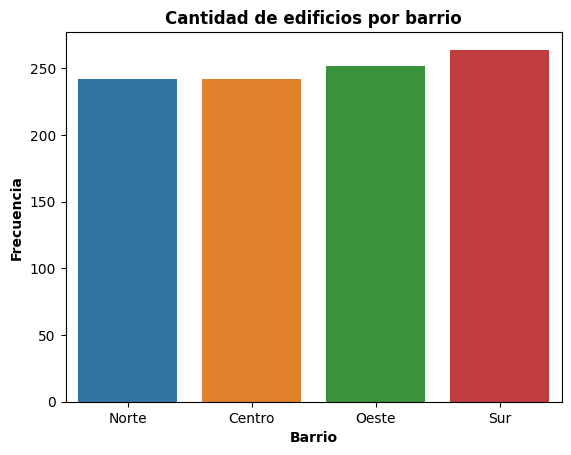

In [66]:
sns.countplot(barrio, x='barrio', hue='barrio')
plt.title("Cantidad de edificios por barrio", weight='bold')
plt.xlabel("Barrio", weight='bold')
plt.ylabel("Frecuencia", weight='bold')

### Análisis dataset de los datos

In [67]:
consumo.head()

,id_edificio,tipo_edificio,numero_ocupantes,electrodomesticos,temperatura_media,dia_semana,consumo_energia,metros_cuadrados
0,0,Residencial,76,10,29.84,habil,3264.235229,-800.581029
1,1,Comercial,66,45,16.72,fin_de_semana,6486.624735,4076.513979
2,2,Industrial,37,17,14.30,habil,4276.656672,2706.630060
3,3,Residencial,14,41,32.82,habil,3209.388291,805.112632
4,4,Comercial,26,18,11.92,habil,3266.871261,1175.467038


In [68]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_edificio        1000 non-null   int64  
 1   tipo_edificio      1000 non-null   object 
 2   numero_ocupantes   1000 non-null   int64  
 3   electrodomesticos  1000 non-null   int64  
 4   temperatura_media  1000 non-null   float64
 5   dia_semana         1000 non-null   object 
 6   consumo_energia    1000 non-null   float64
 7   metros_cuadrados   1000 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [69]:
consumo.columns

Index(['id_edificio', 'tipo_edificio', 'numero_ocupantes', 'electrodomesticos',
       'temperatura_media', 'dia_semana', 'consumo_energia',
       'metros_cuadrados'],
      dtype='object')

In [70]:
columnas_describe = ['tipo_edificio', 
                     'numero_ocupantes', 
                     'electrodomesticos',
                     'temperatura_media', 
                     'dia_semana', 
                     'consumo_energia',
                     'metros_cuadrados']
consumo[columnas_describe].describe() # sin id_edificio

,numero_ocupantes,electrodomesticos,temperatura_media,consumo_energia,metros_cuadrados
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.372000,25.606000,22.611390,4096.041892,2365.814826
std,29.061972,14.105166,7.139943,1034.996210,1550.636362
min,1.000000,1.000000,10.050000,1302.748860,-1972.593977
25%,22.000000,13.000000,16.475000,3404.320013,1193.154377
50%,47.000000,26.000000,22.815000,4080.743931,2327.840943
75%,73.250000,38.000000,28.850000,4819.304458,3582.601753
max,99.000000,49.000000,34.990000,7097.948430,6823.252618


In [71]:
metros_cuadrados_negativo = (consumo["metros_cuadrados"] <= 0).sum()
print(f'Hay {metros_cuadrados_negativo} departamentos con el valor de metros cuadrados incorrecto. No pueden ser negativos.')

Hay 66 departamentos con el valor de metros cuadrados incorrecto. No pueden ser negativos.


In [72]:
consumo[consumo["metros_cuadrados"] <= 0]

,id_edificio,tipo_edificio,numero_ocupantes,electrodomesticos,temperatura_media,dia_semana,consumo_energia,metros_cuadrados
0,0,Residencial,76,10,29.84,habil,3264.235229,-800.581029
15,15,Comercial,54,47,13.56,fin_de_semana,3732.892463,-328.924703
16,16,Comercial,34,44,24.62,habil,3084.119209,-1032.146619
19,19,Residencial,19,48,22.67,habil,2624.408677,-792.017384
38,38,Residencial,31,13,15.09,fin_de_semana,1977.064115,-354.420930
...,...,...,...,...,...,...,...,...
889,889,Residencial,16,10,26.17,habil,1307.441130,-190.516798
900,900,Residencial,20,33,13.16,habil,2595.861370,-388.580389
920,920,Comercial,66,37,28.67,fin_de_semana,3926.746675,-527.852946
983,983,Residencial,65,46,20.94,fin_de_semana,3599.104447,-300.085437


In [73]:
# acá noto que metros_cuadrados tiene valores en negativo. Esto no tiene sentido.
# tome la decisión de aplicarles el valor absoluto a aquellos valores negativos
# suponiendo que debió haber sido un error a la hora de cargar en la base de datos
consumo['metros_cuadrados'] = consumo['metros_cuadrados'].apply(lambda x: x if x>= 0 else abs(x))

In [74]:
consumo[columnas_describe].describe() # sin id_edificio

,numero_ocupantes,electrodomesticos,temperatura_media,consumo_energia,metros_cuadrados
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.372000,25.606000,22.611390,4096.041892,2423.628682
std,29.061972,14.105166,7.139943,1034.996210,1458.526570
min,1.000000,1.000000,10.050000,1302.748860,1.559314
25%,22.000000,13.000000,16.475000,3404.320013,1227.341568
50%,47.000000,26.000000,22.815000,4080.743931,2327.840943
75%,73.250000,38.000000,28.850000,4819.304458,3582.601753
max,99.000000,49.000000,34.990000,7097.948430,6823.252618


In [75]:
consumo.shape

(1000, 8)

Misma cantidad de filas (1000) que barrios, no habría problema en aplicar un merge entre los dos datatsets

In [76]:
print(consumo.isnull().sum())

id_edificio          0
tipo_edificio        0
numero_ocupantes     0
electrodomesticos    0
temperatura_media    0
dia_semana           0
consumo_energia      0
metros_cuadrados     0
dtype: int64


In [77]:
print(barrio.duplicated().sum())

0


In [78]:
df = pd.merge(
    left=barrio,
    right=consumo,
    left_on='id_edificio',
    right_on='id_edificio',
    how='inner'
)

Ambos datasets tienen 1000 registros

In [79]:
df.columns

Index(['id_edificio', 'barrio', 'tipo_edificio', 'numero_ocupantes',
       'electrodomesticos', 'temperatura_media', 'dia_semana',
       'consumo_energia', 'metros_cuadrados'],
      dtype='object')

### Ejercicio 2

In [80]:
df["tipo_edificio"].unique()

array(['Residencial', 'Comercial', 'Industrial'], dtype=object)

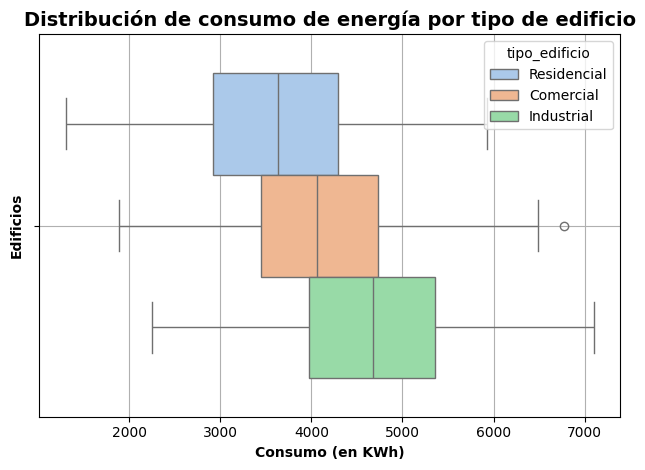

In [81]:
#sns.histplot(df, x='consumo_energia', hue='tipo_edificio', kde=True)
sns.boxplot(df, x='consumo_energia', hue='tipo_edificio', palette='pastel')
plt.title("Distribución de consumo de energía por tipo de edificio", fontsize=14, weight='bold')
plt.ylabel("Edificios", weight='bold')
plt.xlabel("Consumo (en KWh)", weight='bold')
plt.tight_layout()
plt.grid()
plt.show()

La explicación a la clienta podría ser
Los edificios de tipo industrial tienen un consumo mayor al resto, comenzando aproximadamente en 2200KWh extendiendose hasta los 7000KWh.La mayoría de estos se concentran entre 4000 y 5500 KWh.

Le siguen los comerciales, Que van desde apenas un poco menos de 2000KWh hasta los 6500 aproximadamente y poseen la mayor concentración entre 3500 y 4500 KWh

Luego, los de menos consumo son los residenciales, con un consumo que va desde 1500KWh hasta los 6000, y sus valores se concentran entre 2900 y 4200 KWh

### Ejercicio 3

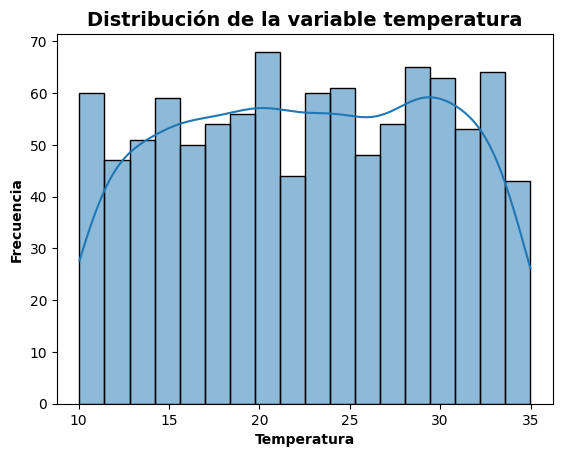

In [82]:
sns.histplot(df, x='temperatura_media', kde=True, bins=18)
plt.title("Distribución de la variable temperatura", fontsize=14, weight='bold')
plt.ylabel("Frecuencia", weight='bold')
plt.xlabel("Temperatura", weight='bold')
plt.show()

No parece ser cierto que los datos de temperatura estén sesgados, están distribuidos simétricamente.

### Ejercicio 4

In [83]:
df.head()

,id_edificio,barrio,tipo_edificio,numero_ocupantes,electrodomesticos,temperatura_media,dia_semana,consumo_energia,metros_cuadrados
0,0,Norte,Residencial,76,10,29.84,habil,3264.235229,800.581029
1,1,Norte,Comercial,66,45,16.72,fin_de_semana,6486.624735,4076.513979
2,2,Norte,Industrial,37,17,14.30,habil,4276.656672,2706.630060
3,3,Centro,Residencial,14,41,32.82,habil,3209.388291,805.112632
4,4,Oeste,Comercial,26,18,11.92,habil,3266.871261,1175.467038


In [84]:
df.columns

Index(['id_edificio', 'barrio', 'tipo_edificio', 'numero_ocupantes',
       'electrodomesticos', 'temperatura_media', 'dia_semana',
       'consumo_energia', 'metros_cuadrados'],
      dtype='object')

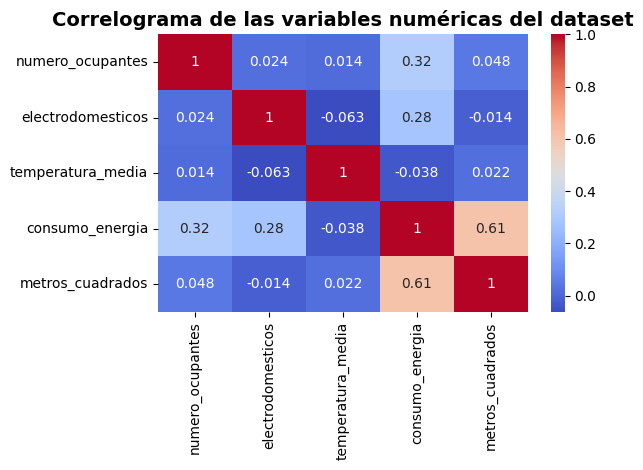

In [85]:
columnas_correlacionar = ['numero_ocupantes',
       'electrodomesticos', 'temperatura_media',
       'consumo_energia', 'metros_cuadrados']
sns.heatmap(df[columnas_correlacionar].corr(), annot=True, cmap='coolwarm')
plt.title("Correlograma de las variables numéricas del dataset", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Ejercicio 5

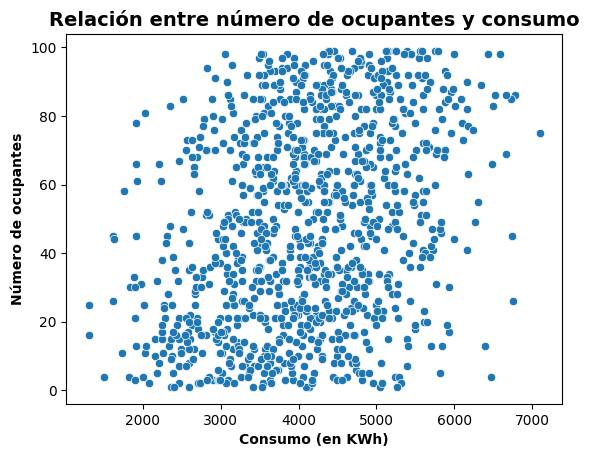

In [86]:
sns.scatterplot(df, x='consumo_energia', y='numero_ocupantes')
plt.title("Relación entre número de ocupantes y consumo", fontsize=14, weight='bold')
plt.ylabel("Número de ocupantes", weight='bold')
plt.xlabel("Consumo (en KWh)", weight='bold')
plt.show()

Parece haber una relación directa muy ligera. Pero principalmente los datos muestran una nube sin una relación lineal identificable.

El correlograma nos muestra que el valor de correlación de pearson es de 0.32 entre estas dos variables. Por eso podría verse la sutil relación directa pero muy ligera.


## Parte 2

In [87]:
columnas_correlacionar

['numero_ocupantes',
 'electrodomesticos',
 'temperatura_media',
 'consumo_energia',
 'metros_cuadrados']

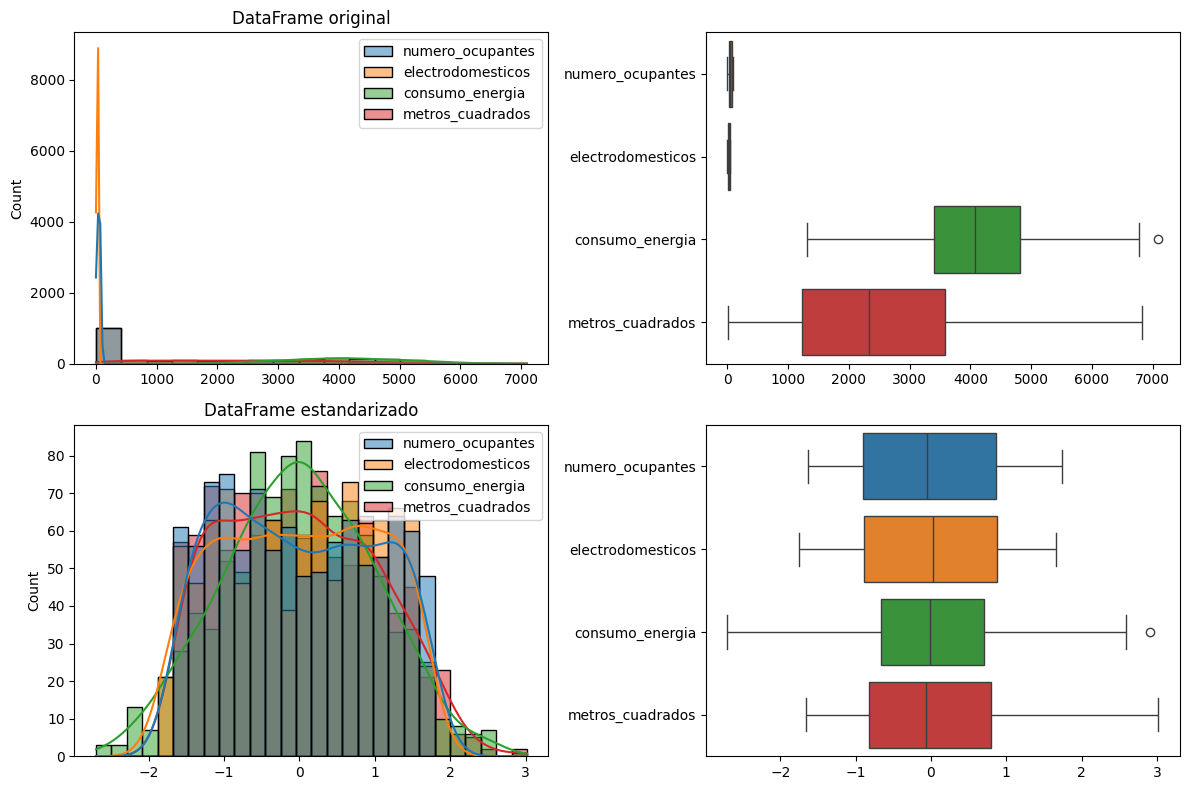

In [99]:
from sklearn.preprocessing import StandardScaler
columnas_relevantes = ['numero_ocupantes','electrodomesticos','consumo_energia','metros_cuadrados']
# Quito temperatura porque no tiene relación lineal con ninguna otra variable
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df[columnas_relevantes]), columns=columnas_relevantes)

fig, axes = plt.subplots(2,2,figsize=(12,8))
sns.histplot(df[columnas_relevantes],kde=True, ax=axes[0,0])
sns.histplot(df_std,kde=True, ax=axes[1,0])
sns.boxplot(df[columnas_relevantes], ax=axes[0,1], orient='h')
sns.boxplot(df_std, ax=axes[1,1], orient='h')
axes[0,0].set_title("DataFrame original")
axes[1,0].set_title("DataFrame estandarizado")
plt.tight_layout()
plt.show()

In [89]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   numero_ocupantes   1000 non-null   float64
 1   electrodomesticos  1000 non-null   float64
 2   consumo_energia    1000 non-null   float64
 3   metros_cuadrados   1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [90]:
df_std.head()

,numero_ocupantes,electrodomesticos,consumo_energia,metros_cuadrados
0,0.951134,-1.106957,-0.804083,-1.113356
1,0.606869,1.375645,2.310906,1.133824
2,-0.391498,-0.610436,0.174595,0.194129
3,-1.183306,1.091919,-0.857102,-1.110248
4,-0.770188,-0.539505,-0.801535,-0.856197


In [91]:
# # Generación de las dummies
columnas_categoricas = ['barrio','tipo_edificio', 'dia_semana']
df = pd.get_dummies(df, columns=["barrio"], dtype=int)
df = pd.get_dummies(df, columns=["tipo_edificio"], dtype=int)
df = pd.get_dummies(df, columns=["dia_semana"], dtype=int)

In [92]:
df

,id_edificio,numero_ocupantes,electrodomesticos,temperatura_media,consumo_energia,metros_cuadrados,barrio_Centro,barrio_Norte,barrio_Oeste,barrio_Sur,tipo_edificio_Comercial,tipo_edificio_Industrial,tipo_edificio_Residencial,dia_semana_fin_de_semana,dia_semana_habil
0,0,76,10,29.84,3264.235229,800.581029,0,1,0,0,0,0,1,0,1
1,1,66,45,16.72,6486.624735,4076.513979,0,1,0,0,1,0,0,1,0
2,2,37,17,14.30,4276.656672,2706.630060,0,1,0,0,0,1,0,0,1
3,3,14,41,32.82,3209.388291,805.112632,1,0,0,0,0,0,1,0,1
4,4,26,18,11.92,3266.871261,1175.467038,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,68,44,23.95,3318.267025,1499.865640,0,1,0,0,0,0,1,0,1
996,996,7,22,14.67,2558.830350,752.823635,0,0,0,1,0,1,0,1,0
997,997,88,20,32.18,5167.923798,3932.952963,0,1,0,0,1,0,0,0,1
998,998,67,37,16.48,2460.767051,551.695329,0,0,1,0,0,0,1,1,0


In [93]:
df_std.columns

Index(['numero_ocupantes', 'electrodomesticos', 'consumo_energia',
       'metros_cuadrados'],
      dtype='object')

In [94]:
import statsmodels.formula.api as smf

modelo1 = smf.ols(formula = 'consumo_energia ~ numero_ocupantes + electrodomesticos + metros_cuadrados',
                  data=df_std).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:        consumo_energia   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     375.6
Date:              jue., 03 jul. 2025   Prob (F-statistic):          3.87e-163
Time:                        19:19:21   Log-Likelihood:                -1040.5
No. Observations:                1000   AIC:                             2089.
Df Residuals:                     996   BIC:                             2109.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -3.4e-16      0.02

### Ejercicio 2

In [95]:
# viendo los p values, todas las variables son explicativas
# todos están cercanos al 0% de evidencia que no sean importantes en la predicción

### Ejercicio 3

In [96]:
df_std.columns

Index(['numero_ocupantes', 'electrodomesticos', 'consumo_energia',
       'metros_cuadrados'],
      dtype='object')

In [97]:
df_prediccion = pd.DataFrame({'numero_ocupantes' : [26],
                              'electrodomesticos': [19],
                              'metros_cuadrados': [5000]})
print(df_prediccion)
modelo1.predict(df_prediccion)

   numero_ocupantes  electrodomesticos  metros_cuadrados
0                26                 19              5000


0    3001.238929
dtype: float64

Viendo la predicción del modelo, vemos que lo que la empresa "AlfajoresRicos" es casi igual. Por lo tanto no podemos suponer que sea necesario iniciar una investigación

### Ejercicio 4

In [98]:
# como no tomamos los valores categóricos de las dummies, lo generamos ahora en un modelo2
df = pd.get_dummies(df, columns=["barrio"], dtype=int)

KeyError: "None of [Index(['barrio'], dtype='object')] are in the [columns]"

In [ ]:
df_std['barrio_Centro'] = df['barrio_Centro']
df_std['barrio_Norte'] = df['barrio_Norte']
df_std['barrio_Oeste'] = df['barrio_Oeste']
df_std['barrio_Sur'] = df['barrio_Sur']

In [ ]:
modelo2 = smf.ols(formula = 'consumo_energia ~ numero_ocupantes + electrodomesticos + metros_cuadrados + barrio_Centro	+ barrio_Norte + barrio_Sur',
                  data=df_std).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:        consumo_energia   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     253.3
Date:                Thu, 03 Jul 2025   Prob (F-statistic):          3.03e-196
Time:                        19:11:37   Log-Likelihood:                -954.77
No. Observations:                1000   AIC:                             1924.
Df Residuals:                     993   BIC:                             1958.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1507      0.04

In [ ]:
round(-0.1535 - 0.5710, 4)

-0.7245

Según el modelo número 2 que se hizo, podemos decir que si un edificio está en el centro y otro en zona sur, el del centro tendrá un consumo mayor, de un 0,5710 KWh y si es de zona sur tendrá un consumo menor, -0.1535 KWh. Existiendo una diferencia entre ambos de -0.7245 KWh
